In [1]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt


# Defining the dimensions of checkerboard
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints_left = []
objpoints_right = []

# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints_left = []
imgpoints_right = []


# Defining the world coordinates for 3D points
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:CHECKERBOARD[1], 0:CHECKERBOARD[0]].T.reshape(-1, 2)

prev_img_shape = None

# Extracting path of individual image stored in a given directory
# NOTE I have split images in 2 separate subfolders

images = sorted(glob.glob('left/*.png'))
assert images

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (CHECKERBOARD[1],CHECKERBOARD[0]), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        objpoints_left.append(objp)
        
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints_left.append(corners2)
 
        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, (CHECKERBOARD[1],CHECKERBOARD[0]), corners2, ret)

#    cv2.imshow('img',img)
#    cv2.waitKey(0)

cv2.destroyAllWindows()

images = sorted(glob.glob('right/*.png'))
assert images

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (CHECKERBOARD[1],CHECKERBOARD[0]), cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        objpoints_right.append(objp)
        
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints_right.append(corners2)
        


In [2]:
#calibrate left camera

#calib_flags = (cv2.CALIB_FIX_PRINCIPAL_POINT + cv2.CALIB_RATIONAL_MODEL)

ret, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints_left, imgpoints_left, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtxL)
print("dist : \n")
print(distL)




Camera matrix : 

[[703.65303703   0.         621.95117549]
 [  0.         703.60913175 372.72462528]
 [  0.           0.           1.        ]]
dist : 

[[-3.28835426e-01  1.40793437e-01 -2.08668634e-04  1.02740841e-04
  -3.09108598e-02]]


In [3]:
#calibrate right camera

ret, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints_right, imgpoints_right, gray.shape[::-1], None, None)
print("Camera matrix : \n")
print(mtxR)
print("dist : \n")
print(distR)

Camera matrix : 

[[699.99036531   0.         647.56624704]
 [  0.         700.19347857 372.87690316]
 [  0.           0.           1.        ]]
dist : 

[[-3.27182661e-01  1.40652980e-01 -1.12873800e-04  5.06599912e-04
  -3.24680579e-02]]


NEW Camera matrix : 

[[ 25.11457001   0.         640.        ]
 [  0.          25.11300296 360.        ]
 [  0.           0.           1.        ]]
ROI1 : 

(0, 0, 0, 0)
NEW Camera matrix : 

[[ 54.79135254   0.         640.        ]
 [  0.          54.80725112 360.        ]
 [  0.           0.           1.        ]]
ROI2 : 

(0, 0, 0, 0)


Text(0.5, 1.0, 'Rectified right image')

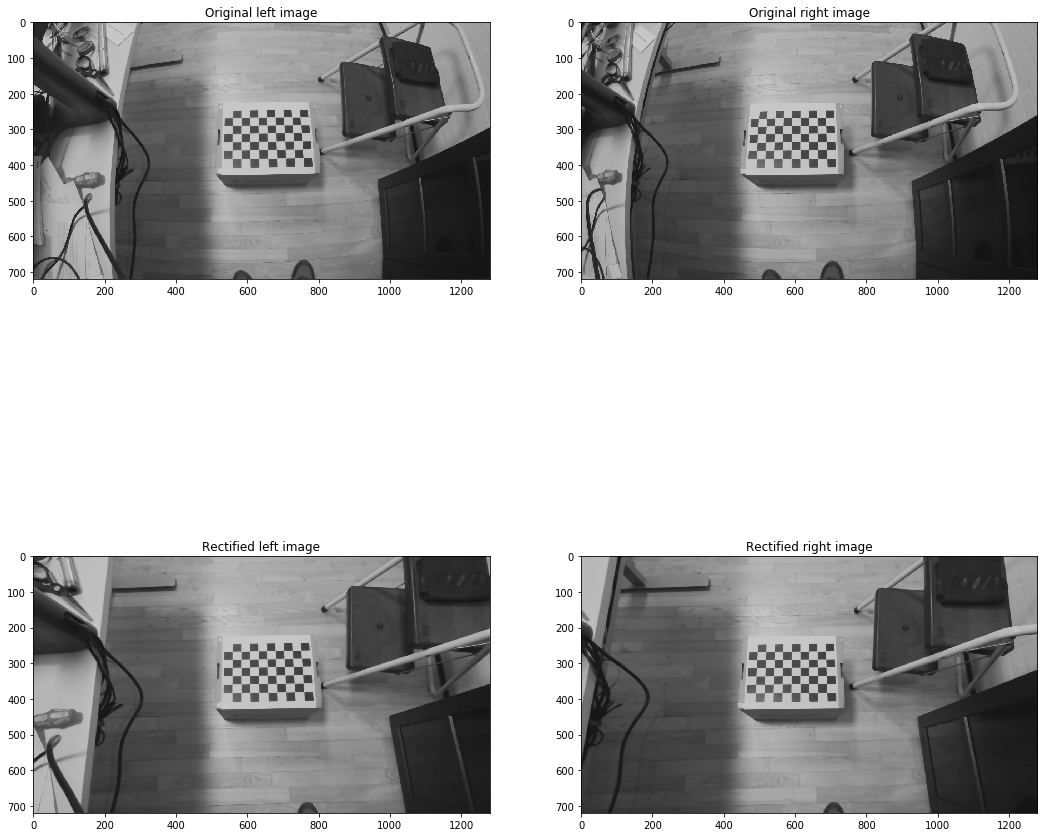

In [5]:
#Test the calibration by undistorting

#undistort
imgL = cv2.imread('left-0000.png')
imgR = cv2.imread('right-0000.png')
h,  w = imgL.shape[:2]


# cv2.getOptimalNewCameraMatrix() warps image. see more: https://answers.opencv.org/question/102485/problem-with-getoptimalnewcameramatrix/

#mtxL_m = mtxL
#mtxR_m = mtxR
#mtxL_m[0][0] = mtxL_m[0][0]*1.01
#mtxL_m[1][1] = mtxL_m[1][1]*1.01 
#mtxR_m[0][0] = mtxL_m[0][0]*1.01
#mtxR_m[1][1] = mtxL_m[1][1]*1.01 

#print("modified mtxL")
#print(mtxL_m)
#print("modified mtxR")
#print(mtxR_m)

#newcameramtxL, roi1=cv2.getOptimalNewCameraMatrix(mtxL,distL,(w,h),1,(w,h), centerPrincipalPoint = 1 )
#newcameramtxR, roi2=cv2.getOptimalNewCameraMatrix(mtxR,distR,(w,h),1,(w,h), centerPrincipalPoint = 1 )

print("NEW Camera matrix : \n")
print(newcameramtxL)
print("ROI1 : \n")
print(roi1)

print("NEW Camera matrix : \n")
print(newcameramtxR)
print("ROI2 : \n")
print(roi2)


#undistort without calculating new camera matrix
udistL = cv2.undistort(imgL, mtxL, distL, None, None)
udistR = cv2.undistort(imgR, mtxR, distR, None, None)

# crop the image
#x,y,w,h = roi1
#dstL = udistL[y:y+h, x:x+w]
#x,y,w,h = roi2
#dstR = udistR[y:y+h, x:x+w]

#cv2.imshow('img',dstL)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#cv2.imshow('img',dstR)
#cv2.waitKey(0)
#cv2.destroyAllWindows()



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax[0][0].imshow(imgL)
ax[0][0].set_title('Original left image')
ax[0][1].imshow(imgR)
ax[0][1].set_title('Original right image')
ax[1][0].imshow(udistL)
ax[1][0].set_title('Rectified left image')
ax[1][1].imshow(udistR)
ax[1][1].set_title('Rectified right image')

In [4]:
#stereo calibrate

stereocalibration_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-5)
stereocalibration_flags = (cv2.CALIB_FIX_K3 + cv2.CALIB_FIX_K4 + cv2.CALIB_FIX_K5 + cv2.CALIB_FIX_ASPECT_RATIO + cv2.CALIB_ZERO_TANGENT_DIST + cv2.CALIB_SAME_FOCAL_LENGTH + cv2.CALIB_RATIONAL_MODEL) 
stereocalibration_retval, cameraMatrix1, distCoeffs1, cameraMatrix2, distCoeffs2, R, T, E, F = cv2.stereoCalibrate(objpoints_left,imgpoints_left,imgpoints_right,mtxL,distL,mtxR,distR,gray.shape[::-1], flags = stereocalibration_flags, criteria = stereocalibration_criteria)

print("RETVAL: \n")
print(stereocalibration_retval)
print("Camera matrix 1: \n")
print(cameraMatrix1)
print("Camera matrix 2: \n")
print(cameraMatrix2)
print("R: \n")
print(R)
print("T: \n")
print(T)
print("E: \n")
print(E)
print("F: \n")
print(F)

RETVAL: 

0.31315522332344525
Camera matrix 1: 

[[722.18651254   0.         632.28591361]
 [  0.         722.26844481 371.59398328]
 [  0.           0.           1.        ]]
Camera matrix 2: 

[[722.18651254   0.         648.18162611]
 [  0.         722.26844481 374.00890445]
 [  0.           0.           1.        ]]
R: 

[[ 0.99996286 -0.00564917  0.00650869]
 [ 0.00566109  0.99998233 -0.00181446]
 [-0.00649832  0.00185123  0.99997717]]
T: 

[[-3.57477866]
 [-0.00771987]
 [ 0.05702264]]
E: 

[[-2.72644298e-04 -5.70359241e-02 -7.61622754e-03]
 [ 3.37904535e-02  6.29562153e-03  3.57506820e+00]
 [-1.25175745e-02 -3.57475911e+00  6.53652208e-03]]
F: 

[[-1.96178966e-07 -4.10350755e-05  1.14147062e-02]
 [ 2.43108853e-05  4.52893512e-06  1.84049542e+00]
 [-1.54700027e-02 -1.83248485e+00  1.00000000e+00]]


In [13]:
P1 = np.zeros(shape=(3,4)) 
P2 = np.zeros(shape=(3,4))

R1 = np.zeros(shape=(3,3))
R2 = np.zeros(shape=(3,3))

R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(cameraMatrix1,distCoeffs1,cameraMatrix2,distCoeffs2,gray.shape[::-1], R, T, alpha=0)


print("R1: \n")
print(R1)
print("R2: \n")
print(R2)
print("P1: \n")
print(P1)
print("P2: \n")
print(P2)
print("Q: \n")
print(Q)
print("ROI 1: \n")
print(roi1)
print("ROI 2: \n")
print(roi2)

R1: 

[[ 9.99949204e-01 -3.51874794e-03 -9.44501824e-03]
 [ 3.51031176e-03  9.99993425e-01 -9.09617530e-04]
 [ 9.44815685e-03  8.76416367e-04  9.99954981e-01]]
R2: 

[[ 9.99870470e-01  2.15925784e-03 -1.59493103e-02]
 [-2.14487533e-03  9.99997278e-01  9.18814066e-04]
 [ 1.59512509e-02 -8.84485770e-04  9.99872379e-01]]
P1: 

[[720.57895565   0.         681.87982178   0.        ]
 [  0.         720.57895565 410.05609894   0.        ]
 [  0.           0.           1.           0.        ]]
P2: 

[[ 7.20578956e+02  0.00000000e+00  6.81879822e+02 -2.57624398e+03]
 [ 0.00000000e+00  7.20578956e+02  4.10056099e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]
Q: 

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -6.81879822e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -4.10056099e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.20578956e+02]
 [ 0.00000000e+00  0.00000000e+00  2.79701365e-01 -0.00000000e+00]]
ROI 1: 

(0, 0, 1280, 720)

Text(0.5, 1.0, 'Rectified right image')

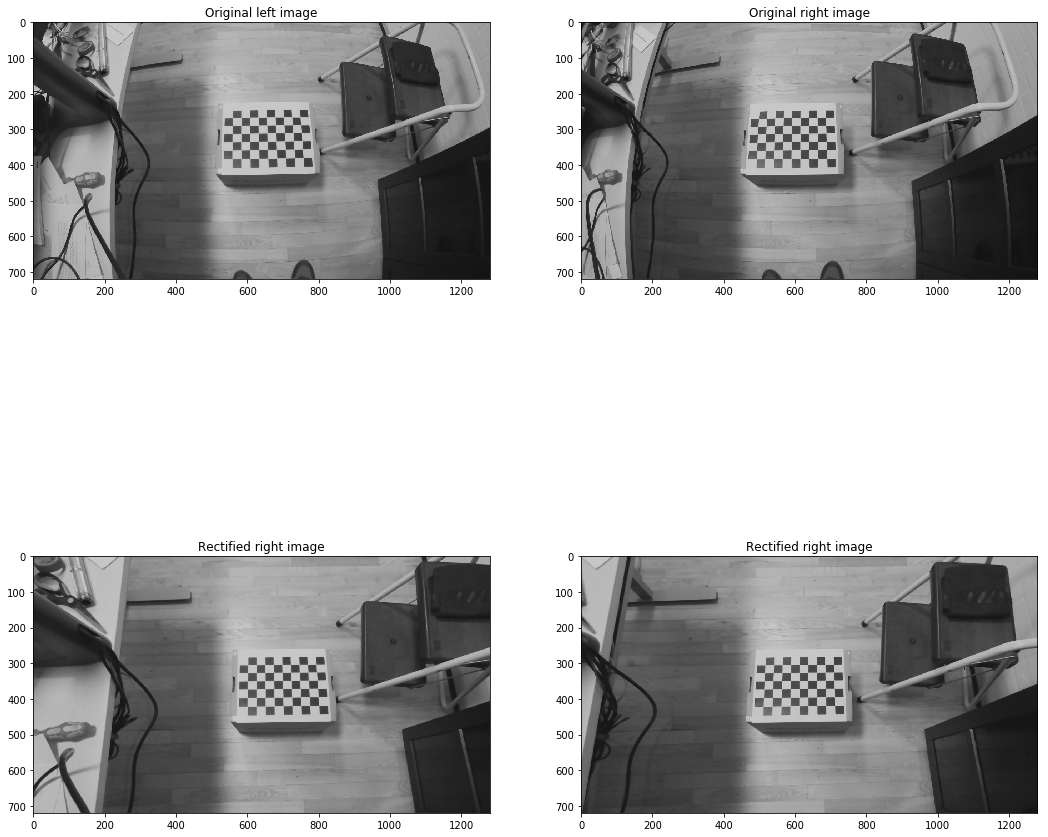

In [14]:
### TEST ## 
#initialize maps

imgL = cv2.imread('left/left-0000.png')
imgR = cv2.imread('right/right-0000.png')



map1x, map1y = cv2.initUndistortRectifyMap(cameraMatrix1, distCoeffs1, R1, P1, gray.shape[::-1], cv2.CV_32FC1)
map2x, map2y = cv2.initUndistortRectifyMap(cameraMatrix2, distCoeffs2, R2, P2, gray.shape[::-1], cv2.CV_32FC1)


Limg = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR);
Rimg = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR);


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))
ax[0][0].imshow(imgL)
ax[0][0].set_title('Original left image')
ax[0][1].imshow(imgR)
ax[0][1].set_title('Original right image')
ax[1][0].imshow(Limg)
ax[1][0].set_title('Rectified right image')
ax[1][1].imshow(Rimg)
ax[1][1].set_title('Rectified right image')

In [16]:
np.savez('calib_left.npz', mtxL=mtxL, distL=distL, rvecsL=rvecsL, tvecsL=tvecsL)
np.savez('calib_right.npz', mtxR=mtxR, distR=distR, rvecsR=rvecsR, tvecsR=tvecsR)
np.savez('calib_stereo.npz', cameraMatrix1=cameraMatrix1, distCoeffs1=distCoeffs1, cameraMatrix2=cameraMatrix2, distCoeffs2=distCoeffs2, R=R, T=T, E=E, F=F)
np.savez('rectified_stereo.npz', R1=R1, R2=R2, P1=P1, P2=P2, Q=Q, roi1=roi1, roi2=roi2)


data1 = np.load('calib_left.npz')
print(data1['mtxL'])
print(data1['distL'])
data2 = np.load('calib_right.npz')
print(data2['mtxR'])
print(data2['distR'])

[[722.18651254   0.         632.28591361]
 [  0.         722.26844481 371.59398328]
 [  0.           0.           1.        ]]
[[-3.28835426e-01  1.40793437e-01 -2.08668634e-04  1.02740841e-04
  -3.09108598e-02]]
[[722.18651254   0.         648.18162611]
 [  0.         722.26844481 374.00890445]
 [  0.           0.           1.        ]]
[[-3.27182661e-01  1.40652980e-01 -1.12873800e-04  5.06599912e-04
  -3.24680579e-02]]
